# Thuật toán ABC tiêu chuẩn

In [ ]:
import random
import math
import matplotlib.pyplot as plt

Các tham số toàn cục

In [ ]:
SN = 10           # Tổng số ong
maxCycle = 18     # Số vòng lặp tối đa
limit = 10        # Giới hạn số lần thử không cải thiện
D = 3             # Số chiều
x_min = -2.0      # Cận dưới
x_max = 2.0       # Cận trên

Hàm mục tiêu

Có 1 số hàm có thể thử, ví dụ như trong ảnh

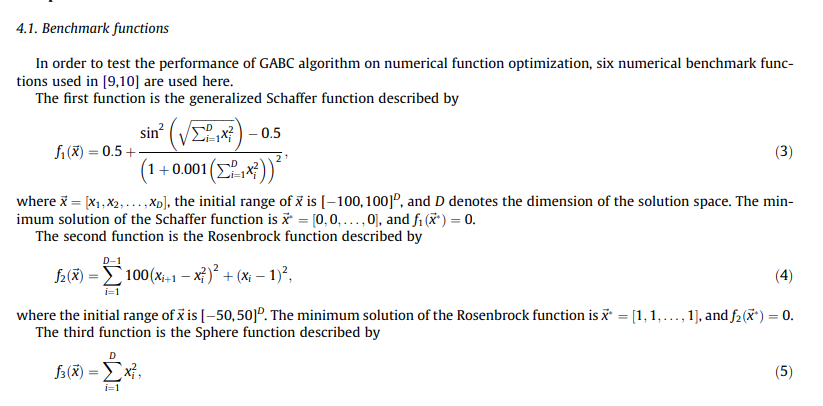

Ở đây, tác giả sử dụng hàm đầu tiên (Schaffer function) để tính toán

In [ ]:
def objective(x): # Hàm Schaffer
    sum_sq = sum(val**2 for val in x)
    tu_so = math.sin(math.sqrt(sum_sq))**2 - 0.5
    mau_so = (1 + 0.001 * sum_sq)**2
    return 0.5 + tu_so / mau_so

Hàm tính độ thích nghi

In [ ]:
def calculate_fitness(f):
    """Hàm tính độ thích nghi (Fitness)"""
    if f >= 0:
        return 1.0 / (1.0 + f)
    return 1.0 + abs(f)


Hàm main

In [ ]:
def main():
    # Số lượng nguồn thức ăn (thường bằng SN / 2)
    foodNumber = SN // 2

    # Khởi tạo các cấu trúc dữ liệu
    X = []          # Chứa các vector giải pháp
    Fitness = []    # Chứa giá trị fitness tương ứng
    trial = [0] * foodNumber  # Đếm số lần không cải thiện

    # --- 1. Khởi tạo quần thể ban đầu ---
    for i in range(foodNumber):
        # Tạo vector ngẫu nhiên trong khoảng [x_min, x_max]
        row = [random.uniform(x_min, x_max) for _ in range(D)]
        X.append(row)
        Fitness.append(calculate_fitness(objective(row)))

    # Lưu giải pháp tốt nhất toàn cục
    bestX = list(X[0]) # Copy list để tránh tham chiếu
    bestFitness = Fitness[0]
    history_best_obj = [] # Tạo list để lưu lịch sử từng vòng lặp
    # --- Vòng lặp chính của thuật toán ---
    for cycle in range(maxCycle):
        # === Giai đoạn Ong Thợ (Employed Bees) ===
        for i in range(foodNumber):
            # Chọn k ngẫu nhiên khác i
            k = i
            while k == i:
                k = random.randrange(foodNumber)
            # Tạo giải pháp mới v
            v = list(X[i]) # Copy vector hiện tại
            d = random.randrange(D) # Chọn chiều ngẫu nhiên để biến đổi
            phi = random.uniform(-1, 1) # Hệ số ngẫu nhiên [-1, 1]
            # Công thức cập nhật vị trí: v_{ij} = x_{ij} + phi * (x_{ij} - x_{kj})
            v[d] = X[i][d] + phi * (X[i][d] - X[k][d])

            # Kiểm tra biên (Clamping)
            v[d] = max(x_min, min(x_max, v[d]))

            # Đánh giá tham lam (Greedy Selection)
            vObj = objective(v)
            vFit = calculate_fitness(vObj)

            if vFit > Fitness[i]:
                X[i] = v
                Fitness[i] = vFit
                trial[i] = 0
            else:
                trial[i] += 1

        # === Giai đoạn Ong Quan Sát (Onlooker Bees) ===
        # Tính tổng fitness để làm mẫu số cho vòng quay roulette
        sumFit = sum(Fitness)

        for t in range(foodNumber):
            # Chọn nguồn thức ăn i dựa trên xác suất (Roulette Wheel)
            r = random.uniform(0, sumFit)
            s = 0
            i = 0
            # Tìm chỉ số i
            for idx in range(foodNumber):
                s += Fitness[idx]
                if s >= r:
                    i = idx
                    break

            # Chọn k ngẫu nhiên khác i (tương tự giai đoạn Ong Thợ)
            k = i
            while k == i:
                k = random.randrange(foodNumber)

            # Tạo giải pháp mới v
            v = list(X[i]) # Copy vector
            d = random.randrange(D)
            phi = random.uniform(-1, 1)

            v[d] = X[i][d] + phi * (X[i][d] - X[k][d])
            v[d] = max(x_min, min(x_max, v[d]))

            vObj = objective(v)
            vFit = calculate_fitness(vObj)

            if vFit > Fitness[i]:
                X[i] = v
                Fitness[i] = vFit
                trial[i] = 0
            else:
                trial[i] += 1

        # === Giai đoạn Ong Trinh Sát (Scout Bees) ===
        for i in range(foodNumber):
            if trial[i] > limit:
                # Tạo lại nguồn thức ăn ngẫu nhiên mới hoàn toàn
                X[i] = [random.uniform(x_min, x_max) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0

        # === Cập nhật Best Global ===
        for i in range(foodNumber):
            if Fitness[i] > bestFitness:
                bestFitness = Fitness[i]
                bestX = list(X[i]) # Copy vector tốt nhất
        current_best_obj = objective(bestX)
        history_best_obj.append(current_best_obj)
    # --- Kết quả ---
    print("Best: ", end="")
    for v in bestX:
        print(f"{v:.6f} ", end="")
    print(f" f = {objective(bestX):.6f}")
    # === Vẽ biểu đồ ===
    plt.figure(figsize=(10, 6))
    plt.plot(history_best_obj, marker='o', linestyle='-', color='r', label='Best Value')
    plt.title('ABC Algorithm Convergence (Sự hội tụ của thuật toán ABC)')
    plt.xlabel('Cycle (Vòng lặp)')
    plt.ylabel('Objective Function Value (Giá trị hàm mục tiêu)')
    plt.grid(True)
    plt.legend()
    plt.show()

Best: 1.420286 -2.000000 -0.462215 -1.901455 -0.053429  f = 0.009716


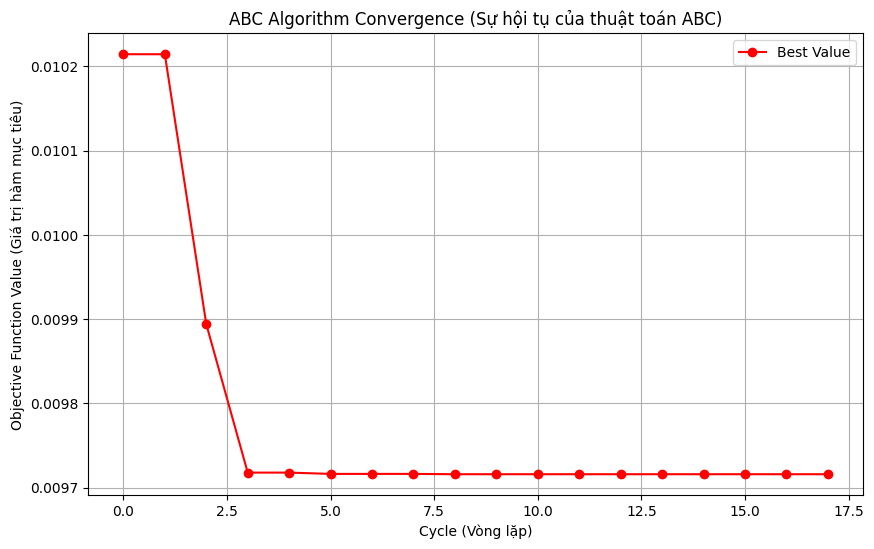

In [ ]:
if __name__ == "__main__":
    main()

# Các biến thể của thuật toán ABC


## Thuật toán Gbest - Guided ABC

Về cơ bản, thuật toán GABC sẽ tối ưu hàm tìm kiếm (solution search equation) so với ABC với phương trình dưới đây:
$$
v_{ij}
= x_{ij}
+ \phi_{ij}(x_{ij} - x_{kj})
+ \psi_{ij}(y_j - x_{ij})
$$
Trong đó
- $y_j$: Phần tử thứ $j$ của nghiệm tốt nhất toàn cục ($g_{best}$).
- $\psi_{ij}$: Số ngẫu nhiên trong khoảng $[0, C]$.
- $C$: Tham số điều chỉnh (theo bài báo thì $C = 1.5$ được coi là tối ưu nhất).

Code của GABC (Tương tự với ABC, chỉ thay đổi 1 chút ở hàm tìm kiếm)


Best Solution (Gbest): -0.000000 0.000000 -0.000000 
Min Objective Value = 0.000000000


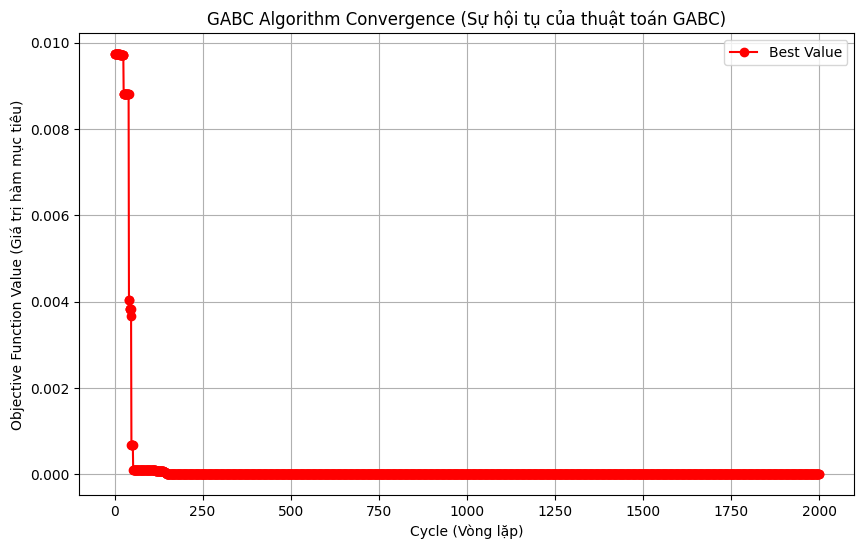

In [16]:
import random
import math

# --- Các tham số toàn cục ---
SN = 20           # Tổng số ong (Tăng nhẹ để tìm kiếm tốt hơn)
maxCycle = 2000     # Số vòng lặp tối đa
limit = 10        # Giới hạn số lần thử không cải thiện
D = 3             # Số chiều
x_min = -2.0     # Cận dưới (Mở rộng miền tìm kiếm cho hàm Schaffer)
x_max = 2.0     # Cận trên
C = 1.5           # Tham số điều chỉnh lực hút về Gbest

def objective(x):
    sum_sq = sum(val**2 for val in x)
    numerator = math.sin(math.sqrt(sum_sq))**2 - 0.5
    denominator = (1 + 0.001 * sum_sq)**2
    return 0.5 + numerator / denominator
def calculate_fitness(f):
    """Hàm tính độ thích nghi (Fitness)"""
    if f >= 0:
        return 1.0 / (1.0 + f)
    return 1.0 + abs(f)

def main():
    # Số lượng nguồn thức ăn (thường bằng SN / 2)
    foodNumber = SN // 2
    # Khởi tạo các cấu trúc dữ liệu
    X = []          # Chứa các vector giải pháp
    Fitness = []    # Chứa giá trị fitness tương ứng
    trial = [0] * foodNumber  # Đếm số lần không cải thiện
    history_best_obj = []
    # --- 1. Khởi tạo quần thể ban đầu ---
    for i in range(foodNumber):
        # Tạo vector ngẫu nhiên trong khoảng [x_min, x_max]
        row = [random.uniform(x_min, x_max) for _ in range(D)]
        X.append(row)
        Fitness.append(calculate_fitness(objective(row)))

    # Lưu giải pháp tốt nhất toàn cục (Gbest) ngay từ đầu - điểm mới của GABC
    bestX = list(X[0])
    bestFitness = Fitness[0]
    # Tìm bestX ban đầu chuẩn xác nhất
    for i in range(foodNumber):
        if Fitness[i] > bestFitness:
            bestFitness = Fitness[i]
            bestX = list(X[i])

    # --- Vòng lặp chính của thuật toán ---
    for cycle in range(maxCycle):

        # === Giai đoạn Ong Thợ (Employed Bees) ===
        for i in range(foodNumber):
            # Chọn k ngẫu nhiên khác i
            k = i
            while k == i:
                k = random.randrange(foodNumber)

            # Tạo giải pháp mới v
            v = list(X[i]) # Copy vector hiện tại
            d = random.randrange(D) # Chọn chiều ngẫu nhiên

            # [GABC] Tạo các hệ số ngẫu nhiên
            phi = random.uniform(-1, 1) # Hệ số khám phá [-1, 1]
            psi = random.uniform(0, C)  # Hệ số khai thác [0, C]

            # [GABC] Công thức cập nhật vị trí cải tiến:
            # v_{ij} = x_{ij} + phi*(x_{ij} - x_{kj}) + psi*(gbest_j - x_{ij})
            term1 = phi * (X[i][d] - X[k][d])       # Học từ hàng xóm (Exploration)
            term2 = psi * (bestX[d] - X[i][d])      # Học từ Gbest (Exploitation)
            v[d] = X[i][d] + term1 + term2
            # Kiểm tra biên (Clamping)
            v[d] = max(x_min, min(x_max, v[d]))
            # Đánh giá tham lam (Greedy Selection)
            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[i]:
                X[i] = v
                Fitness[i] = vFit
                trial[i] = 0
            else:
                trial[i] += 1

        # === Giai đoạn Ong Quan Sát (Onlooker Bees) ===
        sumFit = sum(Fitness)

        if sumFit == 0: sumFit = 1e-9

        for t in range(foodNumber):
            # Chọn nguồn thức ăn i dựa trên xác suất (Roulette Wheel)
            r = random.uniform(0, sumFit)
            s = 0
            i = 0
            for idx in range(foodNumber):
                s += Fitness[idx]
                if s >= r:
                    i = idx
                    break

            # Chọn k ngẫu nhiên khác i
            k = i
            while k == i:
                k = random.randrange(foodNumber)

            # Tạo giải pháp mới v
            v = list(X[i])
            d = random.randrange(D)

            # [GABC] Áp dụng công thức cải tiến cho cả Ong Quan Sát
            phi = random.uniform(-1, 1)
            psi = random.uniform(0, C)

            term1 = phi * (X[i][d] - X[k][d])
            term2 = psi * (bestX[d] - X[i][d])

            v[d] = X[i][d] + term1 + term2
            v[d] = max(x_min, min(x_max, v[d]))

            vObj = objective(v)
            vFit = calculate_fitness(vObj)

            if vFit > Fitness[i]:
                X[i] = v
                Fitness[i] = vFit
                trial[i] = 0
            else:
                trial[i] += 1

        # === Giai đoạn Ong Trinh Sát (Scout Bees) ===
        for i in range(foodNumber):
            if trial[i] > limit:
                # Tạo lại nguồn thức ăn ngẫu nhiên mới hoàn toàn
                X[i] = [random.uniform(x_min, x_max) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0

        # === Cập nhật Best Global ===
        # Cập nhật lại Gbest sau mỗi vòng lặp để dùng cho vòng sau
        for i in range(foodNumber):
            if Fitness[i] > bestFitness:
                bestFitness = Fitness[i]
                bestX = list(X[i])
        current_best_obj = objective(bestX)
        history_best_obj.append(current_best_obj)
    # --- Kết quả ---
    print("Best Solution (Gbest): ", end="")
    for v in bestX:
        print(f"{v:.6f} ", end="")
    print(f"\nMin Objective Value = {objective(bestX):.9f}")
    plt.figure(figsize=(10, 6))
    plt.plot(history_best_obj, marker='o', linestyle='-', color='r', label='Best Value')
    plt.title('GABC Algorithm Convergence (Sự hội tụ của thuật toán GABC)')
    plt.xlabel('Cycle (Vòng lặp)')
    plt.ylabel('Objective Function Value (Giá trị hàm mục tiêu)')
    plt.grid(True)
    plt.legend()
    plt.show()
if __name__ == "__main__":
    main()

So sánh GABC và ABC

ABC Final Result: 0.0097166070
GABC Final Result: 0.0098025674


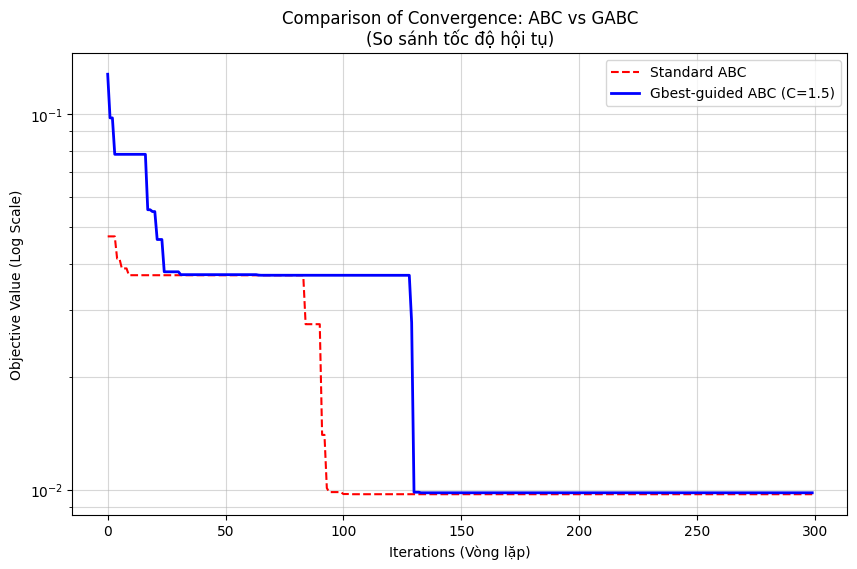

In [10]:
import random
import math
import matplotlib.pyplot as plt

SN = 40             # Tổng số ong (Population)
MAX_CYCLE = 300      # Số vòng lặp (Tăng lên để thấy rõ đoạn hội tụ cuối)
LIMIT = 20          # Giới hạn bỏ cuộc
D = 5               # Số chiều (Dimension) - Tăng độ khó
X_MIN = -10.0       # Cận dưới
X_MAX = 10.0        # Cận trên
C_CONST = 1.5       # Tham số riêng của GABC

def objective(x):
    sum_sq = sum(val**2 for val in x)
    numerator = math.sin(math.sqrt(sum_sq))**2 - 0.5
    denominator = (1 + 0.001 * sum_sq)**2
    return 0.5 + numerator / denominator

def calculate_fitness(f):
    if f >= 0: return 1.0 / (1.0 + f)
    return 1.0 + abs(f)

# --- ENGINE TỐI ƯU HÓA (CORE ENGINE) ---
def run_optimization(algo_type="ABC"):
    """
    Chạy thuật toán dựa trên algo_type ('ABC' hoặc 'GABC').
    Trả về lịch sử giá trị tốt nhất qua từng vòng lặp.
    """
    # 1. Khởi tạo
    foodNumber = SN // 2
    X = [[random.uniform(X_MIN, X_MAX) for _ in range(D)] for _ in range(foodNumber)]
    Fitness = [calculate_fitness(objective(ind)) for ind in X]
    trial = [0] * foodNumber

    # Tìm Best ban đầu
    best_idx = 0
    best_val = Fitness[0]
    for i in range(1, foodNumber):
        if Fitness[i] > best_val:
            best_val = Fitness[i]
            best_idx = i

    bestX = list(X[best_idx])
    bestObj = objective(bestX)

    history = [] # Lưu lịch sử để vẽ biểu đồ

    # 2. Vòng lặp chính
    for cycle in range(MAX_CYCLE):

        for i in range(foodNumber):
            k = i
            while k == i: k = random.randrange(foodNumber)
            v = list(X[i])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)
            if algo_type == "GABC":
                psi = random.uniform(0, C_CONST)
                v[d] = X[i][d] + phi*(X[i][d] - X[k][d]) + psi*(bestX[d] - X[i][d])
            else:
                v[d] = X[i][d] + phi*(X[i][d] - X[k][d])
            # ==============================================

            v[d] = max(X_MIN, min(X_MAX, v[d]))

            vObj = objective(v)
            vFit = calculate_fitness(vObj)

            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else: trial[i] += 1

        # --- B. Giai đoạn Ong Quan Sát (Onlooker Bees) ---
        sumFit = sum(Fitness)
        if sumFit == 0: sumFit = 1e-9

        for _ in range(foodNumber):
            r = random.uniform(0, sumFit)
            acc = 0; selected_i = 0
            for idx in range(foodNumber):
                acc += Fitness[idx]
                if acc >= r: selected_i = idx; break

            i = selected_i
            k = i
            while k == i: k = random.randrange(foodNumber)

            v = list(X[i])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)

            # Áp dụng cùng logic cập nhật như Ong Thợ
            if algo_type == "GABC":
                psi = random.uniform(0, C_CONST)
                v[d] = X[i][d] + phi*(X[i][d] - X[k][d]) + psi*(bestX[d] - X[i][d])
            else:
                v[d] = X[i][d] + phi*(X[i][d] - X[k][d]) # ABC standard

            v[d] = max(X_MIN, min(X_MAX, v[d]))

            vObj = objective(v)
            vFit = calculate_fitness(vObj)

            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else: trial[i] += 1

        # --- C. Giai đoạn Ong Trinh Sát (Scout Bees) ---
        for i in range(foodNumber):
            if trial[i] > LIMIT:
                X[i] = [random.uniform(X_MIN, X_MAX) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0

        # --- D. Cập nhật Best Global ---
        for i in range(foodNumber):
            currentObj = objective(X[i])
            if currentObj < bestObj: # Bài toán cực tiểu hóa
                bestObj = currentObj
                bestX = list(X[i])

        history.append(bestObj)

    return history

if __name__ == "__main__":

    # Chạy thực nghiệm (Nên chạy nhiều lần và lấy trung bình, ở đây demo chạy 1 lần)
    loss_abc = run_optimization("ABC")
    print(f"ABC Final Result: {loss_abc[-1]:.10f}")

    loss_gabc = run_optimization("GABC")
    print(f"GABC Final Result: {loss_gabc[-1]:.10f}")

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))

    # Dùng semilogy (trục Y log) để thấy rõ sự hội tụ về 0
    plt.semilogy(loss_abc, 'r--', linewidth=1.5, label='Standard ABC')
    plt.semilogy(loss_gabc, 'b-', linewidth=2.0, label='Gbest-guided ABC (C=1.5)')

    plt.title('Comparison of Convergence: ABC vs GABC\n(So sánh tốc độ hội tụ)')
    plt.xlabel('Iterations (Vòng lặp)')
    plt.ylabel('Objective Value (Log Scale)')
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.5)

    plt.show()

## Thuật toán IABC ( Improved ABC )

Dựa trên tài liệu <i>Improved Artificial Bee Colony Algorithm Based Gravity
Matching Navigation Method </i> <br>

Trong ABC tiêu chuẩn,
$$
v_{ij}
= x_{ij}
+ \phi_{ij}(x_{ij} - x_{kj})
$$
Với bước nhảy $\phi_{ij}$ là ngẫu nhiên trong khoảng cố định $[-1, 1]$. <br>
Để cải tiến, IABC đưa ra tham số $SF$ để điều chỉnh độ lớn bước nhảy bằng cách dựa vào góc $\phi$ giữa hướng di chuyển của ong và hướng tới vị trí tốt nhất toàn cục. <br>
Góc $\phi$ được tính theo công thức:
$$
\cos \phi =
\begin{cases}
\dfrac{
\left( x_i(k) - x_i(k+1) \right)\,\cdot\,\left( x_{\text{best}}(k) - x_i(k) \right)
}{
\left\| x_i(k) - x_i(k+1) \right\|\;
\left\| x_{\text{best}}(k) - x_i(k) \right\|
}
& \text{if } \phi_{ij} > 0,
\\[1.2em]
\dfrac{
\left( x_i(k+1) - x_i(k) \right)\,\cdot\,\left( x_{\text{best}}(k) - x_i(k) \right)
}{
\left\| x_i(k+1) - x_i(k) \right\|\;
\left\| x_{\text{best}}(k) - x_i(k) \right\|
}
& \text{if } \phi_{ij} \le 0.
\end{cases}
$$
SF sẽ được tính theo công thức:
$$
SF_i(k+1) =
\begin{cases}
SF_i(k)\,(1 + \cos\phi) & \text{if } \cos\phi > 0, \\[0.8em]
\dfrac{SF_i(k)}{\,2 - \cos\phi\,} & \text{if } \cos\phi \le 0.
\end{cases}
$$
Do đó, chúng ta có thể tính toán hàm tìm kiếm dựa trên công thức mới:
$$v_{ij} = x_{ij} + SF_{i}(k) \times \phi_{ij} \times (x_{ij} - x_{kj})$$

<br>
Ngoài ra, IABC cho phép tính toán <b> xác suất chuyển tiếp </b> giữa các con ong. <br> Tức là đối với các vòng đầu, thuật toán ưu tiên các con ong thợ (employed bees) có giá trị độ thích nghi (fitness value) nhỏ , cho nhiều cơ hội hơn để tuyển mộ các con ong quan sát (onlooker bees) nhằm duy trì tính đa dạng (exploration). Khi số lượng vòng lặp lớn, thuật toán sẽ ưu tiên thu hẹp phạm vi tìm kiếm để tăng tốc độ hội tụ (exploitation)


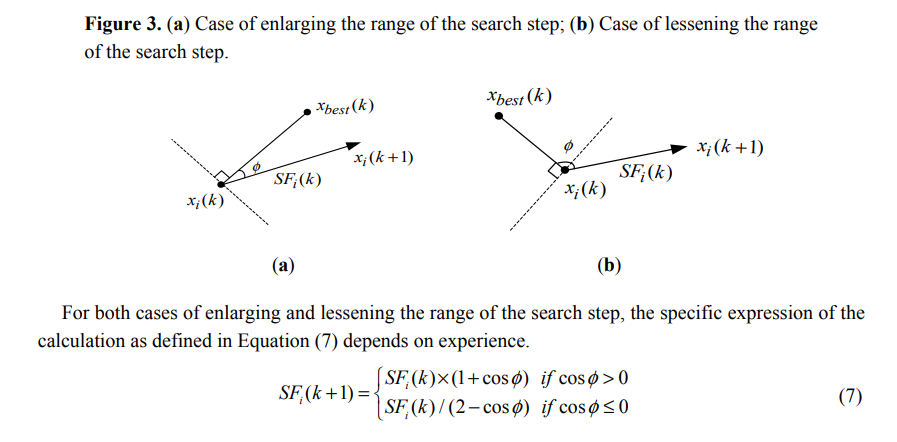

Final Best Objective: 0.0003788809


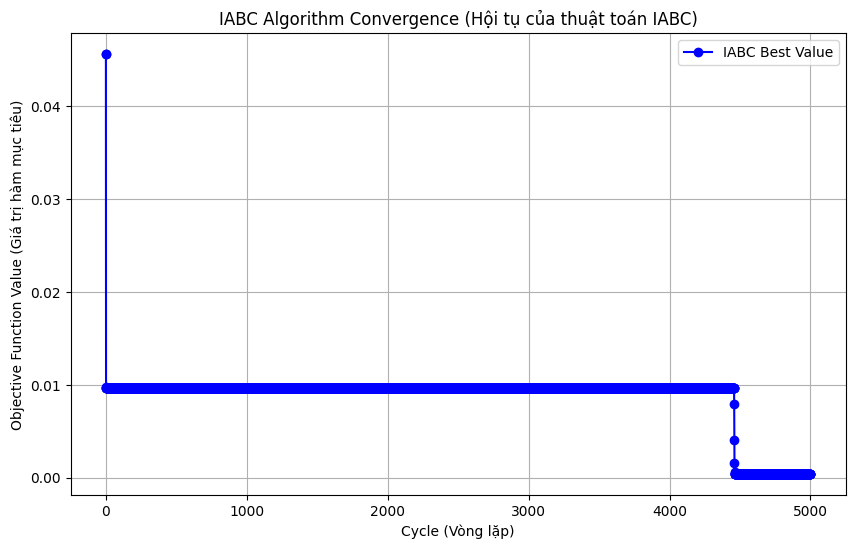

In [30]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# --- CÁC THAM SỐ TOÀN CỤC ---
SN = 30               # Tổng số ong (Tăng lên để chia nhóm)
MAX_CYCLE = 5000       # Số vòng lặp
LIMIT = 20            # Giới hạn số lần thử không cải thiện
D = 3                 # Số chiều (Dimension)
X_MIN = -10.0         # Cận dưới
X_MAX = 10.0          # Cận trên

# --- THAM SỐ IABC (Sensors 2014) ---
SF_INIT = 0.5         # SF ban đầu [cite: 161]
BETA = 10.0           # Hệ số điều chỉnh xác suất [cite: 216]
SUB_COLONY_RATIO = 0.5 # Tỷ lệ giảm SF cho nhóm phụ (SF' < SF)

def objective_function(x):
    sum_sq = sum(val**2 for val in x)
    numerator = math.sin(math.sqrt(sum_sq))**2 - 0.5
    denominator = (1 + 0.001 * sum_sq)**2
    return 0.5 + numerator / denominator
def calculate_fitness(obj_value):
    if obj_value >= 0:
        return 1.0 / (1.0 + obj_value)
    return 1.0 + abs(obj_value)
def calculate_cos_phi(old_x, new_x, best_x):
    vec_move = np.array(new_x) - np.array(old_x)
    vec_best = np.array(best_x) - np.array(old_x)
    norm_move = np.linalg.norm(vec_move)
    norm_best = np.linalg.norm(vec_best)
    if norm_move == 0 or norm_best == 0:
        return 0.0

    cos_val = np.dot(vec_move, vec_best) / (norm_move * norm_best)
    return cos_val

def update_sf(current_sf, cos_theta):
    if cos_theta > 0:
        # Hướng tốt (Góc nhọn) -> Tăng bước nhảy để khai thác
        new_sf = current_sf * (1.0 + cos_theta)
    else:
        # Hướng xấu (Góc tù) -> Giảm bước nhảy để tìm kỹ hơn
        new_sf = current_sf / (2.0 - abs(cos_theta))
    # Giới hạn SF để thuật toán ổn định
    return max(0.1, min(2.0, new_sf))
def main():
    # Số lượng nguồn thức ăn (Ong thợ = SN/2)
    food_number = SN // 2
    # Khởi tạo quần thể
    X = []
    Fitness = []
    trial = [0] * food_number
    SF_list = [SF_INIT] * food_number # Mỗi con ong có SF riêng
    # Khởi tạo ngẫu nhiên
    for i in range(food_number):
        row = [random.uniform(X_MIN, X_MAX) for _ in range(D)]
        X.append(row)
        Fitness.append(calculate_fitness(objective_function(row)))

    # Tìm Best ban đầu
    best_idx = np.argmax(Fitness)
    best_x = list(X[best_idx])
    best_fitness = Fitness[best_idx]

    history_best_obj = []

    # --- VÒNG LẶP CHÍNH ---
    for cycle in range(1, MAX_CYCLE + 1):
        # === 1. GIAI ĐOẠN ONG THỢ (EMPLOYED BEES) & MULTI-GROUP SEARCH ===
        # 1/3 số ong là nhóm chính, 2/3 là nhóm phụ (Sub-colonies)
        # Nhóm phụ sẽ dùng SF nhỏ hơn.
        for i in range(food_number):
            is_sub_colony = i > (food_number // 3)
            # Chọn k ngẫu nhiên khác i
            k = i
            while k == i:
                k = random.randrange(food_number)

            d = random.randrange(D)
            phi = random.uniform(-1, 1)

            current_sf = SF_list[i]

            #  Nếu là sub-colony, giảm SF
            if is_sub_colony:
                use_sf = current_sf * SUB_COLONY_RATIO * random.random() # SF' < SF
            else:
                use_sf = current_sf
            # Tạo giải pháp mới
            v = list(X[i])
            v[d] = X[i][d] + use_sf * phi * (X[i][d] - X[k][d])
            v[d] = max(X_MIN, min(X_MAX, v[d])) # Boundary check
            #  Cập nhật SF cho lần sau
            cos_theta = calculate_cos_phi(X[i], v, best_x)
            SF_list[i] = update_sf(current_sf, cos_theta)
            # Đánh giá tham lam
            v_obj = objective_function(v)
            v_fit = calculate_fitness(v_obj)

            if v_fit > Fitness[i]:
                X[i] = v
                Fitness[i] = v_fit
                trial[i] = 0
            else:
                trial[i] += 1

        # === 2. TÍNH XÁC SUẤT (ADAPTIVE PROBABILITY) ===
        fit_min = min(Fitness)
        sum_fit_mod = sum([f + fit_min for f in Fitness]) # Mẫu số Equation 10
        # P1: Xác suất dựa trên fitness (Standard)
        P1 = [(f + fit_min) / sum_fit_mod for f in Fitness]
        # P2: Xác suất tập trung (Ưu tiên cá thể tốt nhất mạnh hơn)
        # Ở đây ta mô phỏng P2 bằng cách lũy thừa fitness để tăng áp lực chọn lọc
        max_fit = max(Fitness)
        P2 = [1.0 if f == max_fit else 0.0 for f in Fitness] # Extreme exploitation logic
        # Trộn P1 và P2 theo thời gian (Equation 9)
        # Khi cycle nhỏ -> ưu tiên P1 (Khám phá). Khi cycle lớn -> ưu tiên P2 (Khai thác)
        w = math.exp(-BETA * (cycle / MAX_CYCLE)) # Hệ số suy giảm
        Probabilities = [w * p1 + (1 - w) * p2 for p1, p2 in zip(P1, P2)]

        # Chuẩn hóa lại Probabilities để dùng cho Roulette Wheel
        sum_prob = sum(Probabilities)
        Probabilities = [p / sum_prob for p in Probabilities]

        # === 3. GIAI ĐOẠN ONG QUAN SÁT (ONLOOKER BEES) ===
        t = 0 # Số ong quan sát đã chọn xong
        i = 0 # Index duyệt
        while t < food_number:
            # Roulette Wheel Selection
            if random.random() < Probabilities[i]:
                t += 1

                # Logic tìm kiếm giống hệt Ong thợ (có áp dụng SF)
                k = i
                while k == i:
                    k = random.randrange(food_number)
                d = random.randrange(D)
                phi = random.uniform(-1, 1)
                v = list(X[i])
                v[d] = X[i][d] + SF_list[i] * phi * (X[i][d] - X[k][d])
                v[d] = max(X_MIN, min(X_MAX, v[d]))
                # Cập nhật SF cho cả ong quan sát
                cos_theta = calculate_cos_phi(X[i], v, best_x)
                SF_list[i] = update_sf(SF_list[i], cos_theta)
                v_obj = objective_function(v)
                v_fit = calculate_fitness(v_obj)

                if v_fit > Fitness[i]:
                    X[i] = v
                    Fitness[i] = v_fit
                    trial[i] = 0
                else:
                    trial[i] += 1

            i = (i + 1) % food_number

        # === 4. GIAI ĐOẠN ONG TRINH SÁT (SCOUT BEES) ===
        best_current_val = -1

        for i in range(food_number):
            if trial[i] > LIMIT:
                # Tạo mới ngẫu nhiên Equation (6)
                X[i] = [random.uniform(X_MIN, X_MAX) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective_function(X[i]))
                trial[i] = 0
                SF_list[i] = SF_INIT # Reset SF

        # Cập nhật Global Best
        current_best_idx = np.argmax(Fitness)
        if Fitness[current_best_idx] > best_fitness:
            best_fitness = Fitness[current_best_idx]
            best_x = list(X[current_best_idx])

        history_best_obj.append(objective_function(best_x))

    # --- KẾT QUẢ ---
    print(f"Final Best Objective: {objective_function(best_x):.10f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history_best_obj, marker = 'o', linestyle='-', color='blue', label='IABC Best Value')
    plt.title('IABC Algorithm Convergence (Hội tụ của thuật toán IABC)')
    plt.xlabel('Cycle (Vòng lặp)')
    plt.ylabel('Objective Function Value (Giá trị hàm mục tiêu)')
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

## Thuật toán Quick Artificial Bee Colony (qABC) Algorithm
Dựa trên nghiên cứu: *"On the performance of quick artificial bee colony algorithm for dynamic deployment of wireless sensor networks"* (Gorkemli & Al-Dulaimi, 2019).
## 1. Khái niệm cốt lõi
**qABC** là một biến thể của thuật toán ABC tiêu chuẩn, được thiết kế để cải thiện **khả năng tìm kiếm cục bộ (local search)** và **tốc độ hội tụ**. Điểm khác biệt lớn nhất nằm ở **Giai đoạn Ong Quan Sát (Onlooker Bee Phase)**.
## 2. Cơ chế "Láng giềng" (Neighborhood)
Khác với ABC chuẩn (nơi ong quan sát chỉ chọn nguồn thức ăn dựa trên xác suất và tìm kiếm ngẫu nhiên quanh đó), qABC giới thiệu khái niệm **Vùng lân cận**:

1.  **Bán kính lân cận ($r$):** Một tham số điều khiển độ rộng của vùng tìm kiếm.
2.  **Khoảng cách trung bình ($md_m$):** Tính khoảng cách Euclidean trung bình từ nguồn thức ăn hiện tại đến tất cả các nguồn khác trong quần thể.
3.  **Xác định láng giềng:** Một nguồn $x_j$ được coi là hàng xóm của $x_m$ nếu khoảng cách giữa chúng nhỏ hơn $r \times md_m$.
## 3. Cải tiến trong Giai đoạn Ong Quan Sát
Quy trình hoạt động của Ong Quan Sát trong qABC:
1.  **Chọn vùng:** Chọn nguồn thức ăn $x_m$ dựa trên xác suất (như ABC chuẩn).
2.  **Tìm cực trị địa phương:** Tìm nguồn thức ăn **tốt nhất** ($x^{best}_{N_m}$) nằm trong danh sách các "láng giềng" của $x_m$.
3.  **Tối ưu hóa:** Sinh ra giải pháp mới dựa trên **người hàng xóm tốt nhất** này, thay vì dựa trên $x_m$ ban đầu.


**Công thức cập nhật vị trí mới:**
$$v_{i} = x^{best}_{N_m, i} + \phi_{i} (x^{best}_{N_m, i} - x_{k, i})$$


## 4. Ý nghĩa
Cơ chế này giúp thuật toán khai thác triệt để thông tin từ những cá thể tốt nhất trong một khu vực nhỏ trước khi di chuyển sang chỗ khác, giúp thuật toán hội tụ nhanh hơn đáng kể so với ABC gốc (đặc biệt khi $r \ge 1$).

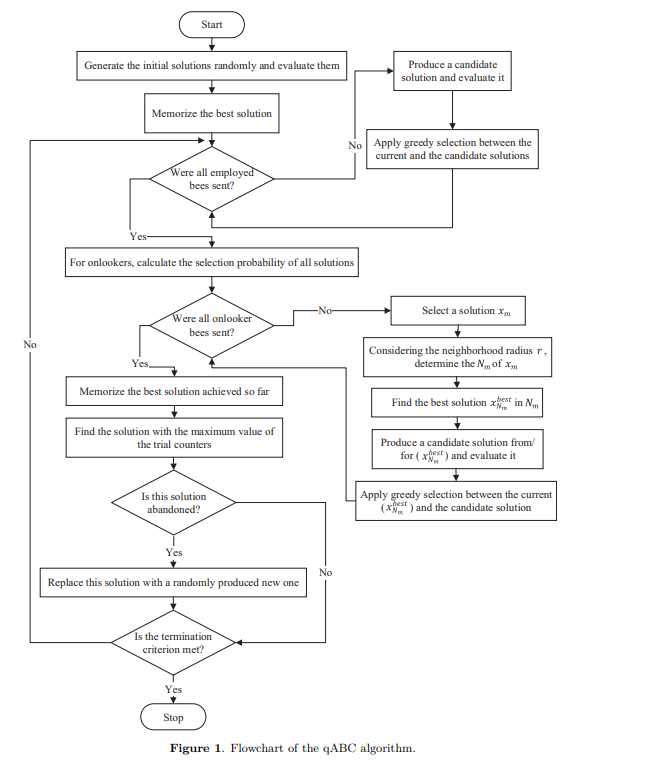

Best Solution (qABC): -0.060823 -0.040633 -0.008395 
Min Objective Value = 0.005416511


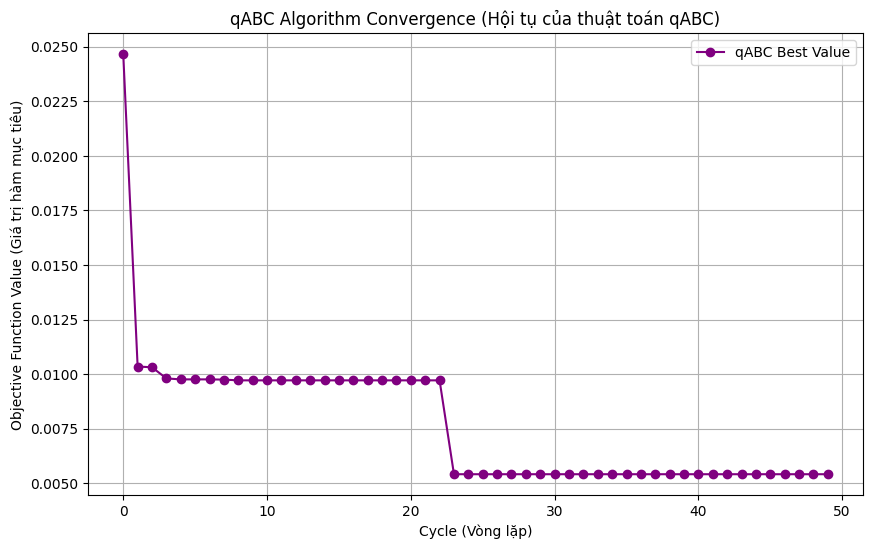

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# --- Các tham số toàn cục ---
SN = 20           # Tổng số ong
maxCycle = 50     # Số vòng lặp (Tăng nhẹ để thấy rõ hội tụ)
limit = 10        # Giới hạn số lần thử không cải thiện
D = 3             # Số chiều
x_min = -2.0      # Cận dưới
x_max = 2.0       # Cận trên
#qABC
r_radius = 1.5    # Neighborhood radius (r >= 1 thường tốt hơn, theo bài báo)

def objective(x):
    sum_sq = sum(val**2 for val in x)
    numerator = math.sin(math.sqrt(sum_sq))**2 - 0.5
    denominator = (1 + 0.001 * sum_sq)**2
    return 0.5 + numerator / denominator

def calculate_fitness(f):
    """Hàm tính độ thích nghi (Fitness)"""
    if f >= 0:
        return 1.0 / (1.0 + f)
    return 1.0 + abs(f)

# Hàm phụ trợ tính khoảng cách Euclidean giữa 2 vector (cho qABC)
def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b)**2 for a, b in zip(p1, p2)))

def main():
    # Số lượng nguồn thức ăn (thường bằng SN / 2)
    foodNumber = SN // 2

    # Khởi tạo các cấu trúc dữ liệu
    X = []          # Chứa các vector giải pháp
    Fitness = []    # Chứa giá trị fitness tương ứng
    trial = [0] * foodNumber  # Đếm số lần không cải thiện
    history_best_obj = []

    # --- 1. Khởi tạo quần thể ban đầu ---
    for i in range(foodNumber):
        # Tạo vector ngẫu nhiên trong khoảng [x_min, x_max]
        row = [random.uniform(x_min, x_max) for _ in range(D)]
        X.append(row)
        Fitness.append(calculate_fitness(objective(row)))

    # Lưu giải pháp tốt nhất toàn cục
    bestX = list(X[0])
    bestFitness = Fitness[0]

    # Tìm bestX ban đầu chuẩn xác nhất
    for i in range(foodNumber):
        if Fitness[i] > bestFitness:
            bestFitness = Fitness[i]
            bestX = list(X[i])
    # --- Vòng lặp chính của thuật toán ---
    for cycle in range(maxCycle):
        # === Giai đoạn Ong Thợ (Employed Bees) - [Giữ nguyên như ABC chuẩn] ===
        for i in range(foodNumber):
            # Chọn k ngẫu nhiên khác i
            k = i
            while k == i:
                k = random.randrange(foodNumber)
            # Tạo giải pháp mới v
            v = list(X[i]) # Copy vector hiện tại
            d = random.randrange(D) # Chọn chiều ngẫu nhiên
            phi = random.uniform(-1, 1)
            # Công thức ABC chuẩn cho ong thợ (Eq. 7 trong bài báo)
            v[d] = X[i][d] + phi * (X[i][d] - X[k][d])
            # Kiểm tra biên (Clamping)
            v[d] = max(x_min, min(x_max, v[d]))
            # Đánh giá tham lam (Greedy Selection)
            vObj = objective(v)
            vFit = calculate_fitness(vObj)

            if vFit > Fitness[i]:
                X[i] = v
                Fitness[i] = vFit
                trial[i] = 0
            else:
                trial[i] += 1
        sumFit = sum(Fitness)
        if sumFit == 0: sumFit = 1e-9
        for t in range(foodNumber):
            # Chọn nguồn thức ăn i dựa trên xác suất (Roulette Wheel)
            r_prob = random.uniform(0, sumFit)
            s_prob = 0
            i = 0 # Index của vùng được chọn (Region Center)
            for idx in range(foodNumber):
                s_prob += Fitness[idx]
                if s_prob >= r_prob:
                    i = idx
                    break
            # --- BẮT ĐẦU LOGIC qABC ---
            # 1. Tính khoảng cách trung bình (mean distance) từ X[i] đến các điểm khác
            total_dist = 0
            distances = [] # Lưu khoảng cách để dùng lại
            for j in range(foodNumber):
                dist = euclidean_distance(X[i], X[j])
                distances.append(dist)
                total_dist += dist
            md_m = total_dist / (foodNumber - 1) if foodNumber > 1 else 0
            # 2. Xác định hàng xóm và tìm con tốt nhất trong đám hàng xóm (Local Best)
            # Mặc định con tốt nhất là chính nó (X[i])
            best_neighbor_idx = i
            best_neighbor_fit = Fitness[i]

            for j in range(foodNumber):
                if i == j: continue
                # Điều kiện hàng xóm: distance < r * md_m
                if distances[j] < r_radius * md_m:
                    if Fitness[j] > best_neighbor_fit:
                        best_neighbor_fit = Fitness[j]
                        best_neighbor_idx = j
            # 3. Tạo giải pháp mới dựa trên Best Neighbor (thay vì X[i])
            # v_{best} = x_{best} + phi * (x_{best} - x_k)
            # Chọn k ngẫu nhiên khác i (đối tác ngẫu nhiên)
            k = i
            while k == i:
                k = random.randrange(foodNumber)

            # Tạo v từ best_neighbor (Eq. 10)
            v = list(X[best_neighbor_idx])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)

            v[d] = X[best_neighbor_idx][d] + phi * (X[best_neighbor_idx][d] - X[k][d])
            v[d] = max(x_min, min(x_max, v[d]))

            vObj = objective(v)
            vFit = calculate_fitness(vObj)

            # Lưu ý quan trọng của qABC: So sánh v với Best Neighbor chứ không phải X[i]
            # Nếu tốt hơn thì cập nhật Best Neighbor
            if vFit > Fitness[best_neighbor_idx]:
                X[best_neighbor_idx] = v
                Fitness[best_neighbor_idx] = vFit
                trial[best_neighbor_idx] = 0
            else:
                trial[best_neighbor_idx] += 1
        # === Giai đoạn Ong Trinh Sát (Scout Bees) ===
        for i in range(foodNumber):
            if trial[i] > limit:
                # Tạo lại nguồn thức ăn ngẫu nhiên mới hoàn toàn
                X[i] = [random.uniform(x_min, x_max) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0

        # === Cập nhật Best Global ===
        for i in range(foodNumber):
            if Fitness[i] > bestFitness:
                bestFitness = Fitness[i]
                bestX = list(X[i])

        current_best_obj = objective(bestX)
        history_best_obj.append(current_best_obj)

    # --- Kết quả ---
    print("Best Solution (qABC): ", end="")
    for v in bestX:
        print(f"{v:.6f} ", end="")
    print(f"\nMin Objective Value = {objective(bestX):.9f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history_best_obj, marker='o', linestyle='-', color='purple', label='qABC Best Value')
    plt.title('qABC Algorithm Convergence (Hội tụ của thuật toán qABC)')
    plt.xlabel('Cycle (Vòng lặp)')
    plt.ylabel('Objective Function Value (Giá trị hàm mục tiêu)')
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

## Thuật toán Enhanced Artificial Bee Colony Algorithm (ABC-SA)

Dựa trên nghiên cứu: *"An Enhanced Artificial Bee Colony Algorithm with Solution Acceptance Rule and Probabilistic Multisearch"* (Yurtkuran & Emel, 2016).

## 1. Giới thiệu chung
ABC-SA là một biến thể nâng cao của thuật toán ABC, được thiết kế để cân bằng tốt hơn giữa khả năng **đa dạng hóa (Diversification)** và **tăng cường (Intensification)**. Thuật toán này khắc phục nhược điểm "kén chọn" (greedy selection) của ABC chuẩn và bổ sung cơ chế tìm kiếm đa dạng.

## 2. Hai cải tiến cốt lõi

### A. Quy tắc chấp nhận giải pháp mới (Solution Acceptance Rule)
Trong ABC chuẩn, nếu giải pháp mới ($v_i$) tệ hơn giải pháp cũ ($x_i$), nó bị loại bỏ ngay lập tức (Greedy Selection). ABC-SA cho phép chấp nhận giải pháp tệ hơn với một xác suất nhất định để thoát khỏi cực trị địa phương (Local Optima).

**Công thức xác suất chấp nhận ($p_a$):**
$$p_a = p_0 \times \frac{1 + \cos(\frac{\text{iter}}{\text{Max.iter}} \times \pi)}{2}$$

* Nếu $r < p_a$: Chấp nhận giải pháp mới dù nó tệ hơn.
* $p_0$: Xác suất chấp nhận ban đầu.
* Cơ chế này giống **Simulated Annealing (Ủ mô phỏng)**: Xác suất chấp nhận cao ở giai đoạn đầu (khám phá) và giảm dần về 0 ở giai đoạn cuối (hội tụ).

### B. Chiến lược tìm kiếm đa dạng xác suất (Probabilistic Multisearch)
Thay vì chỉ dùng 1 công thức tìm kiếm, ABC-SA sử dụng **3 công thức** khác nhau và chọn ngẫu nhiên dựa trên xác suất định trước ($P_{s1}, P_{s2}, P_{s3}$):

1.  **ABC Chuẩn :** $v_{ij} = x_{ij} + \phi (x_{ij} - x_{kj})$ -> Cân bằng.
2.  **Gbest-guided :** $v_{ij} = x_{ij} + \phi (x_{ij} - x_{kj}) + \psi (x_{gbest, j} - x_{ij})$ -> Tăng cường khai thác (Intensification).
3.  **Best-based:** $v_{ij} = x_{best, j} + \phi (x_{ij} - x_{kj})$ -> Hội tụ cực nhanh.

Mỗi lần sinh giải pháp mới, thuật toán sẽ "quay xổ số" để quyết định dùng công thức nào.

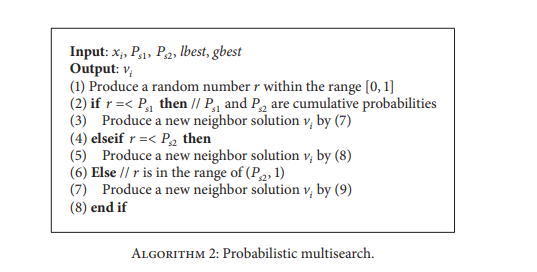

Best Solution (ABC-SA): -2.000000 1.360240 2.000000 
Min Objective Value = 0.009715911


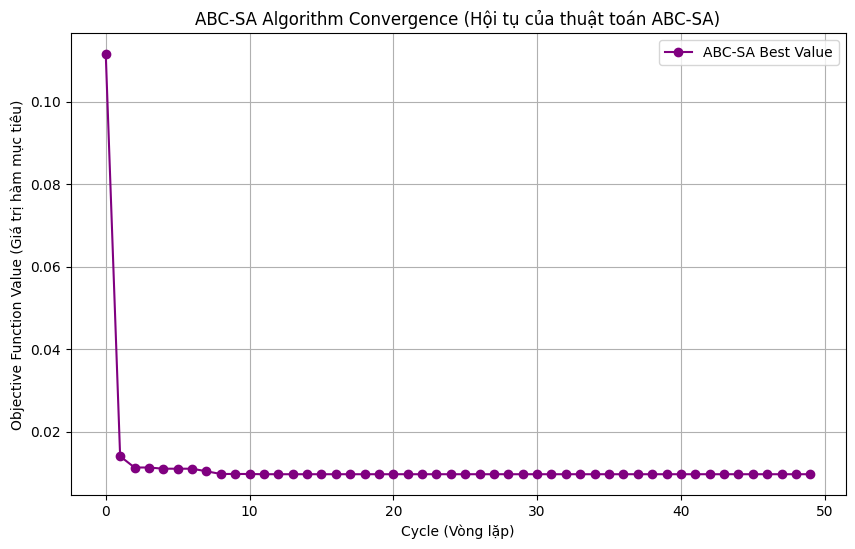

In [17]:
import random
import math
import matplotlib.pyplot as plt

# --- Các tham số toàn cục ---
SN = 20           # Tổng số ong
maxCycle = 50     # Số vòng lặp
limit = 10        # Giới hạn số lần thử không cải thiện
D = 3             # Số chiều
x_min = -2.0      # Cận dưới
x_max = 2.0       # Cận trên
# --- Tham số riêng của ABC-SA (theo bài báo Yurtkuran & Emel 2016) ---
p0 = 0.10         # Xác suất chấp nhận ban đầu (Initial acceptance probability)
Ps1 = 0.20        # Ngưỡng chọn chiến lược 1 (Standard ABC)
Ps2 = 0.60        # Ngưỡng chọn chiến lược 2 (Gbest-guided)ư
# Ps3 (Best-based) sẽ là phần còn lại (1.0 - 0.8 = 0.2)
C_param = 1.5     # Hệ số psi cho công thức Gbest

def objective(x):
    sum_sq = sum(val**2 for val in x)
    numerator = math.sin(math.sqrt(sum_sq))**2 - 0.5
    denominator = (1 + 0.001 * sum_sq)**2
    return 0.5 + numerator / denominator

def calculate_fitness(f):
    """Hàm tính độ thích nghi (Fitness)"""
    if f >= 0:
        return 1.0 / (1.0 + f)
    return 1.0 + abs(f)

def main():
    # Số lượng nguồn thức ăn (thường bằng SN / 2)
    foodNumber = SN // 2

    # Khởi tạo các cấu trúc dữ liệu
    X = []          # Chứa các vector giải pháp
    Fitness = []    # Chứa giá trị fitness tương ứng
    trial = [0] * foodNumber  # Đếm số lần không cải thiện
    history_best_obj = []
    # --- 1. Khởi tạo quần thể ban đầu ---
    for i in range(foodNumber):
        # Tạo vector ngẫu nhiên trong khoảng [x_min, x_max]
        row = [random.uniform(x_min, x_max) for _ in range(D)]
        X.append(row)
        Fitness.append(calculate_fitness(objective(row)))
    # Lưu giải pháp tốt nhất toàn cục (Gbest)
    bestX = list(X[0])
    bestFitness = Fitness[0]
    # Tìm bestX ban đầu
    for i in range(foodNumber):
        if Fitness[i] > bestFitness:
            bestFitness = Fitness[i]
            bestX = list(X[i])
    for cycle in range(maxCycle):
        # Tính xác suất chấp nhận pa theo thời gian (Eq. 6)
        pa = p0 * (1 + math.cos((cycle / maxCycle) * math.pi)) / 2
        # === Giai đoạn Ong Thợ (Employed Bees) ===
        for i in range(foodNumber):
            # Chọn k ngẫu nhiên khác i
            k = i
            while k == i:
                k = random.randrange(foodNumber)

            # Tạo giải pháp mới v
            v = list(X[i])
            d = random.randrange(D)

            # [ABC-SA] Probabilistic Multisearch Strategy (Algorithm 2)
            rand_search = random.random() # Sinh số ngẫu nhiên [0, 1]
            phi = random.uniform(-1, 1)

            if rand_search <= Ps1:
                # Chiến lược 1: Standard ABC (Eq. 7)
                v[d] = X[i][d] + phi * (X[i][d] - X[k][d])
            elif rand_search <= Ps2:
                # Chiến lược 2: Gbest-guided (Eq. 8)
                psi = random.uniform(0, C_param)
                v[d] = X[i][d] + phi * (X[i][d] - X[k][d]) + psi * (bestX[d] - X[i][d])
            else:
                # Chiến lược 3: Best-based (Eq. 9) - Lưu ý: lbest trong bài báo là best hiện tại của quần thể
                # Vì ta đã cập nhật bestX liên tục, ta dùng bestX luôn
                v[d] = bestX[d] + phi * (X[i][d] - X[k][d])

            # Kiểm tra biên (Clamping)
            v[d] = max(x_min, min(x_max, v[d]))

            # [ABC-SA] Solution Acceptance Rule (Algorithm 1)
            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[i]: # Nếu tốt hơn -> Chấp nhận ngay (Greedy)
                X[i] = v
                Fitness[i] = vFit
                trial[i] = 0
            else: # Nếu tệ hơn -> Chấp nhận có điều kiện (Acceptance Rule)
                r_accept = random.random()
                if r_accept < pa: # Chấp nhận giải pháp tồi để thoát local optima
                    X[i] = v
                    Fitness[i] = vFit
                    trial[i] = 0 # Reset trial vì đã "di chuyển"
                else:
                    trial[i] += 1
        # === Giai đoạn Ong Quan Sát (Onlooker Bees) ===
        sumFit = sum(Fitness)
        if sumFit == 0: sumFit = 1e-9
        for t in range(foodNumber):
            # Chọn nguồn thức ăn i dựa trên xác suất (Roulette Wheel)
            r = random.uniform(0, sumFit)
            s = 0
            i = 0
            for idx in range(foodNumber):
                s += Fitness[idx]
                if s >= r:
                    i = idx
                    break

            # Chọn k ngẫu nhiên khác i
            k = i
            while k == i:
                k = random.randrange(foodNumber)

            v = list(X[i])
            d = random.randrange(D)

            # [ABC-SA] Áp dụng lại Multisearch cho Ong Quan Sát
            rand_search = random.random()
            phi = random.uniform(-1, 1)

            if rand_search <= Ps1:
                v[d] = X[i][d] + phi * (X[i][d] - X[k][d])
            elif rand_search <= Ps2:
                psi = random.uniform(0, C_param)
                v[d] = X[i][d] + phi * (X[i][d] - X[k][d]) + psi * (bestX[d] - X[i][d])
            else:
                v[d] = bestX[d] + phi * (X[i][d] - X[k][d])

            v[d] = max(x_min, min(x_max, v[d]))

            # [ABC-SA] Áp dụng lại Acceptance Rule cho Ong Quan Sát
            vObj = objective(v)
            vFit = calculate_fitness(vObj)

            if vFit > Fitness[i]:
                X[i] = v
                Fitness[i] = vFit
                trial[i] = 0
            else:
                r_accept = random.random()
                if r_accept < pa:
                    X[i] = v
                    Fitness[i] = vFit
                    trial[i] = 0
                else:
                    trial[i] += 1

        # === Giai đoạn Ong Trinh Sát (Scout Bees) ===
        for i in range(foodNumber):
            if trial[i] > limit:
                # Tạo lại nguồn thức ăn ngẫu nhiên mới hoàn toàn
                X[i] = [random.uniform(x_min, x_max) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0

        # === Cập nhật Best Global ===
        for i in range(foodNumber):
            if Fitness[i] > bestFitness:
                bestFitness = Fitness[i]
                bestX = list(X[i])

        current_best_obj = objective(bestX)
        history_best_obj.append(current_best_obj)

    # --- Kết quả ---
    print("Best Solution (ABC-SA): ", end="")
    for v in bestX:
        print(f"{v:.6f} ", end="")
    print(f"\nMin Objective Value = {objective(bestX):.9f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history_best_obj, marker='o', linestyle='-', color='purple', label='ABC-SA Best Value')
    plt.title('ABC-SA Algorithm Convergence (Hội tụ của thuật toán ABC-SA)')
    plt.xlabel('Cycle (Vòng lặp)')
    plt.ylabel('Objective Function Value (Giá trị hàm mục tiêu)')
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

## So sánh các thuật toán với nhau

Standard ABC Final Result: 0.0097159132
GABC Final Result: 0.0097159153
IABC Final Result: 0.0097159104
qABC Final Result: 0.0097159156
ABC-SA Final Result: 0.0097159099


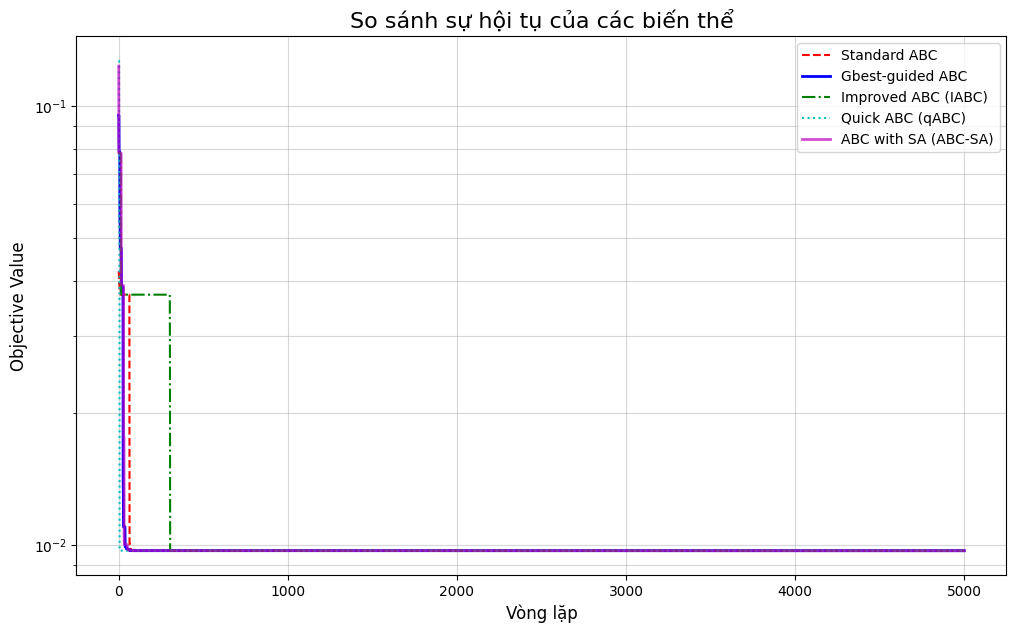

In [32]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
SN = 40             # Population size (Number of bees)
MAX_CYCLE = 5000     # Maximum number of iterations/cycles (Increased for clearer convergence)
LIMIT = 30          # Abandonment limit
D = 5               # Dimension of the problem (Increased difficulty)
X_MIN = -10.0     # Lower bound of search space
X_MAX = 10.0       # Upper bound of search space
# GABC specific
C_GABC = 1.5        # Control parameter for Gbest attraction in GABC
# IABC specific
SF_INIT_IABC = 0.5  # Initial Search Factor for IABC
BETA_IABC = 10.0    # Control parameter for probability change in IABC
# qABC specific
R_RADIUS_qABC = 1.5 # Neighborhood radius for qABC

# ABC-SA specific
P0_ABC_SA = 0.10    # Initial acceptance probability
PS1_ABC_SA = 0.20   # Threshold for Standard ABC strategy
PS2_ABC_SA = 0.60   # Threshold for Gbest-guided strategy (PS3 is the rest)
C_ABC_SA = 1.5      # Control parameter for Gbest attraction in ABC-SA

# --- Objective Function (Schaffer N. 2 Function) ---
def objective(x):
    sum_sq = sum(val**2 for val in x)
    numerator = math.sin(math.sqrt(sum_sq))**2 - 0.5
    denominator = (1 + 0.001 * sum_sq)**2
    return 0.5 + numerator / denominator

# --- Fitness Calculation ---
def calculate_fitness(f):
    if f >= 0:
        return 1.0 / (1.0 + f)
    return 1.0 + abs(f)

# --- Helper for IABC: Cosine of angle between movement and Gbest direction ---
def calculate_cos_phi_iabc(old_x, new_x, best_x):
    vec_move = np.array(new_x) - np.array(old_x)
    vec_best = np.array(best_x) - np.array(old_x)
    norm_move = np.linalg.norm(vec_move)
    norm_best = np.linalg.norm(vec_best)

    if norm_move == 0 or norm_best == 0:
        return 0
    cos_val = np.dot(vec_move, vec_best) / (norm_move * norm_best)
    return cos_val

# --- Helper for qABC: Euclidean Distance ---
def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b)**2 for a, b in zip(p1, p2)))

# --- ABC Variants Implementation ---

def run_optimization_abc():
    foodNumber = SN // 2
    X = [[random.uniform(X_MIN, X_MAX) for _ in range(D)] for _ in range(foodNumber)]
    Fitness = [calculate_fitness(objective(ind)) for ind in X]
    trial = [0] * foodNumber

    bestX = list(X[0])
    bestObj = objective(bestX)
    history = []

    for cycle in range(MAX_CYCLE):
        # Employed Bees
        for i in range(foodNumber):
            k = i
            while k == i: k = random.randrange(foodNumber)
            v = list(X[i])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)
            v[d] = X[i][d] + phi * (X[i][d] - X[k][d])
            v[d] = max(X_MIN, min(X_MAX, v[d]))
            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else: trial[i] += 1

        # Onlooker Bees
        sumFit = sum(Fitness)
        if sumFit == 0: sumFit = 1e-9
        for _ in range(foodNumber):
            r = random.uniform(0, sumFit)
            acc = 0; selected_i = 0
            for idx in range(foodNumber):
                acc += Fitness[idx]
                if acc >= r: selected_i = idx; break
            i = selected_i
            k = i
            while k == i: k = random.randrange(foodNumber)
            v = list(X[i])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)
            v[d] = X[i][d] + phi * (X[i][d] - X[k][d])
            v[d] = max(X_MIN, min(X_MAX, v[d]))
            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else: trial[i] += 1

        # Scout Bees
        for i in range(foodNumber):
            if trial[i] > LIMIT:
                X[i] = [random.uniform(X_MIN, X_MAX) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0

        # Update Best Global
        for i in range(foodNumber):
            currentObj = objective(X[i])
            if currentObj < bestObj:
                bestObj = currentObj
                bestX = list(X[i])
        history.append(bestObj)
    return history

def run_optimization_gabc():
    foodNumber = SN // 2
    X = [[random.uniform(X_MIN, X_MAX) for _ in range(D)] for _ in range(foodNumber)]
    Fitness = [calculate_fitness(objective(ind)) for ind in X]
    trial = [0] * foodNumber
    bestX = list(X[0])
    bestObj = objective(bestX)
    for i in range(foodNumber):
        if Fitness[i] > calculate_fitness(bestObj):
            bestObj = objective(X[i])
            bestX = list(X[i])
    history = []

    for cycle in range(MAX_CYCLE):
        # Employed Bees
        for i in range(foodNumber):
            k = i
            while k == i: k = random.randrange(foodNumber)
            v = list(X[i])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)
            psi = random.uniform(0, C_GABC)
            v[d] = X[i][d] + phi * (X[i][d] - X[k][d]) + psi * (bestX[d] - X[i][d])
            v[d] = max(X_MIN, min(X_MAX, v[d]))
            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else: trial[i] += 1

        # Onlooker Bees
        sumFit = sum(Fitness)
        if sumFit == 0: sumFit = 1e-9
        for _ in range(foodNumber):
            r = random.uniform(0, sumFit)
            acc = 0; selected_i = 0
            for idx in range(foodNumber):
                acc += Fitness[idx]
                if acc >= r: selected_i = idx; break
            i = selected_i
            k = i
            while k == i: k = random.randrange(foodNumber)
            v = list(X[i])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)
            psi = random.uniform(0, C_GABC)
            v[d] = X[i][d] + phi * (X[i][d] - X[k][d]) + psi * (bestX[d] - X[i][d])
            v[d] = max(X_MIN, min(X_MAX, v[d]))
            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else: trial[i] += 1

        # Scout Bees
        for i in range(foodNumber):
            if trial[i] > LIMIT:
                X[i] = [random.uniform(X_MIN, X_MAX) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0

        # Update Best Global
        for i in range(foodNumber):
            currentObj = objective(X[i])
            if currentObj < bestObj:
                bestObj = currentObj
                bestX = list(X[i])
        history.append(bestObj)
    return history

def run_optimization_iabc():
    foodNumber = SN // 2
    X = [[random.uniform(X_MIN, X_MAX) for _ in range(D)] for _ in range(foodNumber)]
    Fitness = [calculate_fitness(objective(ind)) for ind in X]
    trial = [0] * foodNumber
    SF_List = [SF_INIT_IABC] * foodNumber # Mỗi con ong có SF riêng
    # Init Global Best
    bestX = list(X[0])
    bestObj = objective(bestX)
    for i in range(foodNumber):
        if Fitness[i] > calculate_fitness(bestObj):
            bestObj = objective(X[i])
            bestX = list(X[i])
    history = []
    for cycle in range(MAX_CYCLE):
        split_index = foodNumber // 3
        for i in range(foodNumber):
            is_sub_colony = i > split_index

            k = i
            while k == i: k = random.randrange(foodNumber)

            # Lấy SF hiện tại
            current_sf = SF_List[i]

            # [Multi-group] Nếu là sub-colony, giảm bước nhảy để tìm kiếm kỹ hơn
            if is_sub_colony:
                # Dùng hệ số ngẫu nhiên < 1 để giảm SF tạm thời cho lần tìm kiếm này
                use_sf = current_sf * 0.6 * random.random()
            else:
                use_sf = current_sf

            # Tạo vị trí mới
            v = list(X[i])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)

            v[d] = X[i][d] + use_sf * phi * (X[i][d] - X[k][d])
            v[d] = max(X_MIN, min(X_MAX, v[d]))

            # [cite_start][Adaptive SF] Cập nhật SF cho vòng sau dựa trên hướng đi [cite: 185]
            cos_theta = calculate_cos_phi_iabc(X[i], v, bestX)

            if cos_theta > 0: # Hướng tốt (góc nhọn) -> Tăng SF
                SF_List[i] = current_sf * (1.0 + cos_theta)
            else:             # Hướng xấu (góc tù) -> Giảm SF
                SF_List[i] = current_sf / (2.0 - abs(cos_theta))

            # Giới hạn SF để thuật toán không bị "nổ"
            SF_List[i] = max(0.1, min(2.0, SF_List[i]))

            # Greedy Selection
            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else: trial[i] += 1

        # [cite_start]=== 2. Calculate Adaptive Probabilities [cite: 208-216] ===
        # P1: Xác suất tiêu chuẩn (Exploration)
        fit_min = min(Fitness)
        # Equation (10): (fit + fit_min) / sum(...)
        sum_shifted = sum(f + fit_min for f in Fitness)
        if sum_shifted == 0: sum_shifted = 1e-9
        P1 = [(f + fit_min) / sum_shifted for f in Fitness]

        # P2: Xác suất tập trung (Exploitation) - Ưu tiên cực mạnh cho Best
        max_fit = max(Fitness)
        P2 = [1.0 if f == max_fit else 0.0 for f in Fitness]

        # Trộn P1 và P2 theo thời gian (Equation 9)
        w = math.exp(-BETA_IABC * (cycle / MAX_CYCLE))
        Probabilities = [w * p1 + (1 - w) * p2 for p1, p2 in zip(P1, P2)]

        # Chuẩn hóa lại để dùng cho Roulette Wheel
        sum_prob = sum(Probabilities)
        if sum_prob == 0: sum_prob = 1e-9
        Probabilities = [p / sum_prob for p in Probabilities]

        # === 3. Onlooker Bees Phase ===
        t = 0; i = 0
        while t < foodNumber:
            # Roulette Wheel Selection
            if random.random() < Probabilities[i]:
                t += 1
                k = i
                while k == i: k = random.randrange(foodNumber)

                v = list(X[i])
                d = random.randrange(D)
                phi = random.uniform(-1, 1)

                # Onlooker cũng cập nhật SF để duy trì tính thích nghi
                use_sf = SF_List[i]

                v[d] = X[i][d] + use_sf * phi * (X[i][d] - X[k][d])
                v[d] = max(X_MIN, min(X_MAX, v[d]))

                # Cập nhật SF
                cos_theta = calculate_cos_phi_iabc(X[i], v, bestX)
                if cos_theta > 0:
                    SF_List[i] = SF_List[i] * (1.0 + cos_theta)
                else:
                    SF_List[i] = SF_List[i] / (2.0 - abs(cos_theta))
                SF_List[i] = max(0.1, min(2.0, SF_List[i]))

                vObj = objective(v)
                vFit = calculate_fitness(vObj)
                if vFit > Fitness[i]:
                    X[i] = v; Fitness[i] = vFit; trial[i] = 0
                else: trial[i] += 1

            i = (i + 1) % foodNumber

        # === 4. Scout Bees Phase ===
        for i in range(foodNumber):
            if trial[i] > LIMIT:
                X[i] = [random.uniform(X_MIN, X_MAX) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0
                SF_List[i] = SF_INIT_IABC # Reset SF khi sinh ra ong mới

        # === 5. Update Global Best ===
        for i in range(foodNumber):
            currentObj = objective(X[i])
            if currentObj < bestObj:
                bestObj = currentObj
                bestX = list(X[i])
        history.append(bestObj)

    return history

def run_optimization_qabc():
    foodNumber = SN // 2
    X = [[random.uniform(X_MIN, X_MAX) for _ in range(D)] for _ in range(foodNumber)]
    Fitness = [calculate_fitness(objective(ind)) for ind in X]
    trial = [0] * foodNumber

    bestX = list(X[0])
    bestObj = objective(bestX)
    for i in range(foodNumber):
        if Fitness[i] > calculate_fitness(bestObj):
            bestObj = objective(X[i])
            bestX = list(X[i])
    history = []

    for cycle in range(MAX_CYCLE):
        # Employed Bees
        for i in range(foodNumber):
            k = i
            while k == i: k = random.randrange(foodNumber)
            v = list(X[i])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)
            v[d] = X[i][d] + phi * (X[i][d] - X[k][d])
            v[d] = max(X_MIN, min(X_MAX, v[d]))
            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else: trial[i] += 1

        # Onlooker Bees
        sumFit = sum(Fitness)
        if sumFit == 0: sumFit = 1e-9
        for _ in range(foodNumber):
            r_prob = random.uniform(0, sumFit)
            s_prob = 0
            i = 0
            for idx in range(foodNumber):
                s_prob += Fitness[idx]
                if s_prob >= r_prob: i = idx; break

            total_dist = 0
            distances = []
            for j in range(foodNumber):
                dist = euclidean_distance(X[i], X[j])
                distances.append(dist)
                total_dist += dist
            md_m = total_dist / (foodNumber - 1) if foodNumber > 1 else 0

            best_neighbor_idx = i
            best_neighbor_fit = Fitness[i]

            for j in range(foodNumber):
                if i == j: continue
                if distances[j] < R_RADIUS_qABC * md_m:
                    if Fitness[j] > best_neighbor_fit:
                        best_neighbor_fit = Fitness[j]
                        best_neighbor_idx = j

            k = i
            while k == i: k = random.randrange(foodNumber)
            v = list(X[best_neighbor_idx])
            d = random.randrange(D)
            phi = random.uniform(-1, 1)
            v[d] = X[best_neighbor_idx][d] + phi * (X[best_neighbor_idx][d] - X[k][d])
            v[d] = max(X_MIN, min(X_MAX, v[d]))

            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[best_neighbor_idx]:
                X[best_neighbor_idx] = v; Fitness[best_neighbor_idx] = vFit; trial[best_neighbor_idx] = 0
            else: trial[best_neighbor_idx] += 1
        # Scout Bees
        for i in range(foodNumber):
            if trial[i] > LIMIT:
                X[i] = [random.uniform(X_MIN, X_MAX) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0
        # Update Best Global
        for i in range(foodNumber):
            currentObj = objective(X[i])
            if currentObj < bestObj:
                bestObj = currentObj
                bestX = list(X[i])
        history.append(bestObj)
    return history

def run_optimization_abc_sa():
    foodNumber = SN // 2
    X = [[random.uniform(X_MIN, X_MAX) for _ in range(D)] for _ in range(foodNumber)]
    Fitness = [calculate_fitness(objective(ind)) for ind in X]
    trial = [0] * foodNumber

    bestX = list(X[0])
    bestObj = objective(bestX)
    for i in range(foodNumber):
        if Fitness[i] > calculate_fitness(bestObj):
            bestObj = objective(X[i])
            bestX = list(X[i])
    history = []

    for cycle in range(MAX_CYCLE):
        pa = P0_ABC_SA * (1 + math.cos((cycle / MAX_CYCLE) * math.pi)) / 2
        # Employed Bees
        for i in range(foodNumber):
            k = i
            while k == i: k = random.randrange(foodNumber)
            v = list(X[i])
            d = random.randrange(D)
            rand_search = random.random()
            phi = random.uniform(-1, 1)
            if rand_search <= PS1_ABC_SA:
                v[d] = X[i][d] + phi * (X[i][d] - X[k][d])
            elif rand_search <= PS2_ABC_SA:
                psi = random.uniform(0, C_ABC_SA)
                v[d] = X[i][d] + phi * (X[i][d] - X[k][d]) + psi * (bestX[d] - X[i][d])
            else:
                v[d] = bestX[d] + phi * (X[i][d] - X[k][d])
            v[d] = max(X_MIN, min(X_MAX, v[d]))
            vObj = objective(v)
            vFit = calculate_fitness(vObj)
            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else:
                r_accept = random.random()
                if r_accept < pa:
                    X[i] = v; Fitness[i] = vFit; trial[i] = 0
                else: trial[i] += 1
        # Onlooker Bees
        sumFit = sum(Fitness)
        if sumFit == 0: sumFit = 1e-9

        for _ in range(foodNumber):
            r = random.uniform(0, sumFit)
            s = 0; i = 0
            for idx in range(foodNumber):
                s += Fitness[idx]
                if s >= r: i = idx; break

            k = i
            while k == i: k = random.randrange(foodNumber)
            v = list(X[i])
            d = random.randrange(D)
            rand_search = random.random()
            phi = random.uniform(-1, 1)

            if rand_search <= PS1_ABC_SA:
                v[d] = X[i][d] + phi * (X[i][d] - X[k][d])
            elif rand_search <= PS2_ABC_SA:
                psi = random.uniform(0, C_ABC_SA)
                v[d] = X[i][d] + phi * (X[i][d] - X[k][d]) + psi * (bestX[d] - X[i][d])
            else:
                v[d] = bestX[d] + phi * (X[i][d] - X[k][d])

            v[d] = max(X_MIN, min(X_MAX, v[d]))
            vObj = objective(v)
            vFit = calculate_fitness(vObj)

            if vFit > Fitness[i]:
                X[i] = v; Fitness[i] = vFit; trial[i] = 0
            else:
                r_accept = random.random()
                if r_accept < pa:
                    X[i] = v; Fitness[i] = vFit; trial[i] = 0
                else: trial[i] += 1

        # Scout Bees
        for i in range(foodNumber):
            if trial[i] > LIMIT:
                X[i] = [random.uniform(X_MIN, X_MAX) for _ in range(D)]
                Fitness[i] = calculate_fitness(objective(X[i]))
                trial[i] = 0

        # Update Best Global
        for i in range(foodNumber):
            currentObj = objective(X[i])
            if currentObj < bestObj:
                bestObj = currentObj
                bestX = list(X[i])
        history.append(bestObj)
    return history


# --- Run Optimizations and Plot Results ---
if __name__ == "__main__":
    loss_abc = run_optimization_abc()
    print(f"Standard ABC Final Result: {loss_abc[-1]:.10f}")
    loss_gabc = run_optimization_gabc()
    print(f"GABC Final Result: {loss_gabc[-1]:.10f}")
    loss_iabc = run_optimization_iabc()
    print(f"IABC Final Result: {loss_iabc[-1]:.10f}")
    loss_qabc = run_optimization_qabc()
    print(f"qABC Final Result: {loss_qabc[-1]:.10f}")
    loss_abc_sa = run_optimization_abc_sa()
    print(f"ABC-SA Final Result: {loss_abc_sa[-1]:.10f}")
    # Plotting
    plt.figure(figsize=(12, 7))
    plt.semilogy(loss_abc, 'r--', linewidth=1.5, label='Standard ABC')
    plt.semilogy(loss_gabc, 'b-', linewidth=2.0, label='Gbest-guided ABC')
    plt.semilogy(loss_iabc, 'g-.', linewidth=1.5, label='Improved ABC (IABC)')
    plt.semilogy(loss_qabc, 'c:', linewidth=1.5, label='Quick ABC (qABC)')
    plt.semilogy(loss_abc_sa, 'm-', linewidth=2.0, alpha=0.7, label='ABC with SA (ABC-SA)')
    plt.title('So sánh sự hội tụ của các biến thể', fontsize=16)
    plt.xlabel('Vòng lặp', fontsize=12)
    plt.ylabel('Objective Value', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.show()
